## Wel-Come to Basic Statistics - Hypothesis Testing

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

###                                                     BUSINESS PROBLEM-1



#### BACKGROUND: The Lending Club is a peer-to-peer lending site where members make loans to each other. The site makes anonymized data on loans and borrowers publicly available.

    BUSINESS PROBLEM:
    Using lending club loans data, the team would like to test below hypothesis on how different
    factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)


    a. Intrest rate is varied for different loan amounts (Less intrest charged for high loanamounts)
                                                          
    b. Loan length is directly effecting intrest rate.
                                                          
    c. Inrest rate varies for different purpose of loans
                  
    d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.
                  

In [18]:
#Importing LoansData 
loans_data=pd.read_csv('LoansData.csv')
loans_data

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


#### Data Preparing 

In [15]:
nas=loans_data.isnull().sum()
na=loans_data.shape[0]
nan=(nas/na)*100
nan

Amount.Requested                  0.04
Amount.Funded.By.Investors        0.04
Interest.Rate                     0.08
Loan.Length                       0.00
Loan.Purpose                      0.00
Debt.To.Income.Ratio              0.04
State                             0.00
Home.Ownership                    0.04
Monthly.Income                    0.04
FICO.Range                        0.08
Open.CREDIT.Lines                 0.12
Revolving.CREDIT.Balance          0.12
Inquiries.in.the.Last.6.Months    0.12
Employment.Length                 3.08
dtype: float64

#### Hence,There are null values but null values are less then 5% that why i am going to drop the null values..

In [55]:
loans_data.dropna(inplace=True)

In [56]:
loans_data.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length', 'Fico'],
      dtype='object')

In [22]:
#Replaceing the columns names
loans_data.columns=loans_data.columns.str.replace('.','_')

In [23]:
loans_data

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [29]:
loans_data.describe()

,Amount_Requested,Amount_Funded_By_Investors,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
count,2499.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000
mean,12405.462185,12002.374186,5688.931321,10.072887,15223.184622,0.906688
std,7802.933666,7746.767348,3963.118185,4.507416,18281.015258,1.231149
min,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,3500.000000,7.000000,5584.000000,0.000000
50%,10000.000000,10000.000000,5000.000000,9.000000,10948.000000,0.000000
75%,17000.000000,16000.000000,6800.000000,13.000000,18861.000000,1.000000
max,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


<Axes: >

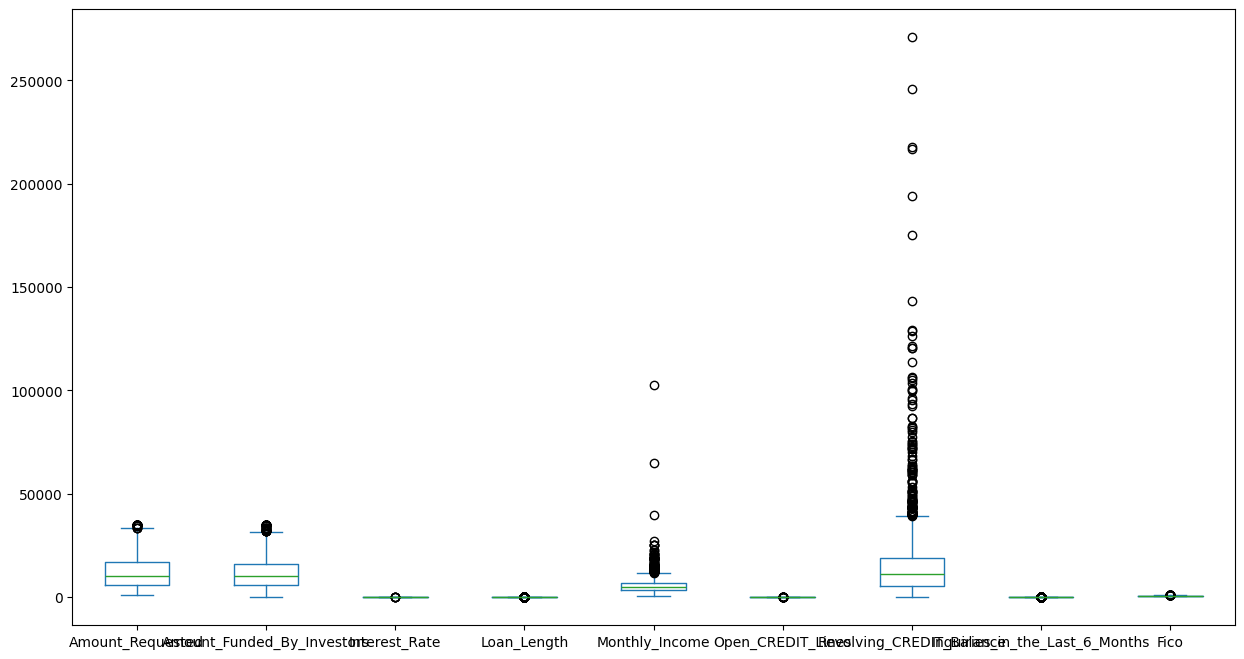

In [57]:
import matplotlib.pyplot as plot

loans_data.plot(kind='box',figsize=(15,8))

#### There are some outliers, but I am not going to remove or change the values because that may affect the data

In [58]:
loans_data.duplicated().sum()


0

In [42]:
loans_data.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [44]:
loans_data.Interest_Rate = pd.to_numeric(loans_data.Interest_Rate.str.replace('%',''))
loans_data.Loan_Length = pd.to_numeric(loans_data.Loan_Length.str.replace(' months',''))

In [46]:
Fico = loans_data.FICO_Range.str.split('-',expand=True).astype('float64')

In [49]:
Fico.columns = ('Low','High')
loans_data['Fico'] = (Fico.Low + Fico.High)/2

In [50]:
loans_data.head(1)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico
0,20000.0,20000.0,8.9,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,737.0


#### Let's begin with the BUSINESS PROBLEM-1

#### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loanamounts)

### Null hypothesis and Alternate hypothesis are as below


#### Null Hypothesis (H₀):  Intrest rate is not varied for different loan amounts (Less intrest charged for high loanamounts)


#### Alternative Hypothesis (Hₐ):  Intrest rate is varied for different loan amounts (Less intrest charged for high loanamounts)


### *Confidence level is = 95%*


### *Significant level is (100-95=5%)*

#### *The significance level is 5% (0.05)*


### *P-critical = 0.05%*



### Conducting the test

In [61]:
IR=stats.pearsonr(loans_data.Interest_Rate,loans_data.Amount_Funded_By_Investors)

In [62]:
IR

PearsonRResult(statistic=0.33159553110364515, pvalue=5.064256950495792e-63)

#### Comparing p-value with p-critical

In [64]:
p=IR.pvalue
if p<0.05:
    print('We reject null hypothesis\n Conclusion: Intrest rate is varied for different loan amounts (Less intrest charged for high loanamounts)')
else:
    print('We failed to reject null hypothesis\n Conclusion: Intrest rate is not varied for different loan amounts (Less intrest charged for high loanamounts)')

We reject null hypothesis
 Conclusion: Intrest rate is varied for different loan amounts (Less intrest charged for high loanamounts)


#### b. Loan length is directly effecting intrest rate

### Null hypothesis and Alternate hypothesis are as below


#### Null Hypothesis (H₀):  Loan length is directly effecting intrest rate


#### Alternative Hypothesis (Hₐ):  Loan length is not directly effecting intrest rate

### *Confidence level is = 95%*


### *Significant level is (100-95=5%)*

#### *The significance level is 5% (0.05)*


### *P-critical = 0.05%*



#### Conducting Test

In [66]:
EIR=stats.pearsonr(loans_data.Interest_Rate,loans_data.Loan_Length)

In [68]:
EIR

PearsonRResult(statistic=0.4250573823094766, pvalue=1.7938010673412537e-106)

#### Comparing p-value with p-critical

In [97]:
p=EIR.pvalue
if p<0.05:
    print('We reject null hypothesis\n Conclusion: Loan length is not directly effecting intrest rate ')
else:
    print('We failed to reject null hypothesis\n Conclusion: Loan length is directly effecting intrest rate')

We reject null hypothesis
 Conclusion: Loan length is not directly effecting intrest rate 


#### c. Inrest rate varies for different purpose of loans

### Null hypothesis and Alternate hypothesis are as below


#### Null Hypothesis (H₀):   Inrest rate varies for different purpose of loans


#### Alternative Hypothesis (Hₐ):   Inrest rate is not varies for different purpose of loans

### *Confidence level is = 95%*


### *Significant level is (100-95=5%)*

#### *The significance level is 5% (0.05)*


### *P-critical = 0.05%*



### Data Set

In [96]:
loans_data['Loan_Purpose'].unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [79]:
lp1 = loans_data.loc[loans_data.Loan_Purpose == 'debt_consolidation','Interest_Rate']
lp2 = loans_data.loc[loans_data.Loan_Purpose == 'credit_card','Interest_Rate']
lp3 = loans_data.loc[loans_data.Loan_Purpose == 'other','Interest_Rate']
lp4 = loans_data.loc[loans_data.Loan_Purpose == 'moving','Interest_Rate']
lp5 = loans_data.loc[loans_data.Loan_Purpose == 'car','Interest_Rate']
lp6 = loans_data.loc[loans_data.Loan_Purpose == 'vacation','Interest_Rate']
lp7 = loans_data.loc[loans_data.Loan_Purpose == 'home_improvement','Interest_Rate']
lp8 = loans_data.loc[loans_data.Loan_Purpose == 'house','Interest_Rate']
lp9 = loans_data.loc[loans_data.Loan_Purpose == 'major_purchase','Interest_Rate']
lp10 = loans_data.loc[loans_data.Loan_Purpose == 'educational','Interest_Rate']
lp11 = loans_data.loc[loans_data.Loan_Purpose == 'medical','Interest_Rate']
lp12 = loans_data.loc[loans_data.Loan_Purpose == 'wedding','Interest_Rate']
lp13 = loans_data.loc[loans_data.Loan_Purpose == 'small_business','Interest_Rate']
lp14 = loans_data.loc[loans_data.Loan_Purpose == 'small_business','Interest_Rate']
                                                                   

#### Conducting test

In [77]:
pol=stats.f_oneway(lp1,lp2,lp3,lp4,lp5,lp6,lp7,lp8,lp9,lp10,lp11,lp12,lp13,lp14)

In [78]:
pol

F_onewayResult(statistic=7.13356625879892, pvalue=8.074920725223914e-14)

#### Comparing p-value with p-critical

In [98]:
p=EIR.pvalue
if p<0.05:
    print('We reject null hypothesis\n Conclusion: Inrest rate will not varies for different purpose of loans ')
else:
    print('We failed to reject null hypothesis\n Conclusion: Inrest rate varies for different purpose of loans')

We reject null hypothesis
 Conclusion: Inrest rate will not varies for different purpose of loans 


#### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

### Null hypothesis and Alternate hypothesis are as below


#### Null Hypothesis (H₀):   There is relationship between FICO scores and Home Ownership


#### Alternative Hypothesis (Hₐ):   There is no relationship between FICO scores and Home Ownership

### *Confidence level is = 95%*


### *Significant level is (100-95=5%)*

#### *The significance level is 5% (0.05)*


### *P-critical = 0.05%*



### Data Set

In [100]:
loans_data['Home_Ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

In [99]:
HO1 = loans_data.loc[loans_data.Home_Ownership == 'MORTGAGE','Fico']
HO2 = loans_data.loc[loans_data.Home_Ownership == 'RENT','Fico']
HO3 = loans_data.loc[loans_data.Home_Ownership == 'OWN','Fico']
HO4 = loans_data.loc[loans_data.Home_Ownership == 'OTHER','Fico']

#### Conducting Test

In [101]:
FICO=stats.f_oneway(HO1,HO2,HO3,HO4)
FICO

F_onewayResult(statistic=20.65464665222211, pvalue=3.2682005447315283e-13)

#### Comparing p-value with p-critical

In [102]:
p=FICO.pvalue
if p<0.05:
    print('We reject null hypothesis\n Conclusion: There is no relationship between FICO scores and Home Ownership')
else:
    print('We failed to reject null hypothesis\n Conclusion: There is relationship between FICO scores and Home Ownership')

We reject null hypothesis
 Conclusion: There is no relationship between FICO scores and Home Ownership


#### BUSINESS PROBLEM - 2
    BACKGROUND: When an order is placed by a customer of a small manufacturing company, a price quote must be developed for that order. Because each order is unique, quotes must be established on an order-by-order basis by a pricing expert. The price quote process is laborintensive, as prices depend on many factors such as the part number, customer, geographic location, market, and order volume. The sales department manager is concerned that the pricing process is too complex, and that there might be too much variability in the quoted prices. An improvement team is tasked with studying and improving the pricing process.



    After interviewing experts to develop a better understanding of the current process, the team designed a study to determine if there is variability between pricing experts. That is, do different pricing experts provide different price quotes? Two randomly selected pricing experts, Mary and Barry, were asked to independently provide prices for twelve randomly selected orders. Eachexpert provided one price for each of the twelve orders.
    
    BUSINESS PROBLEM: We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

### Null hypothesis and Alternate hypothesis are as below


#### Null Hypothesis (H₀): There is difference in the average price quotes provided by Mary and Barry


#### Alternative Hypothesis (Hₐ): There is no difference in the average price quotes provided by Mary and Barry

### *Confidence level is = 95%*


### *Significant level is (100-95=5%)*

#### *The significance level is 5% (0.05)*


### *P-critical = 0.05%*



#### Data Set

In [104]:
Price_Quotes=pd.read_csv('Price_Quotes.csv')
Price_Quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


#### Conducting Test

In [109]:
PQ=stats.ttest_rel(Price_Quotes.Barry_Price,Price_Quotes.Mary_Price)
PQ

TtestResult(statistic=2.5213765108923494, pvalue=0.02840588045242053, df=11)

#### Comparing p-value with p-critical


In [107]:
p=PQ.pvalue
if p<0.05:
    print('We reject null hypothesis\n Conclusion: There is no difference in the average price quotes provided by Mary and Barry')
else:
    print('We failed to reject null hypothesis\n Conclusion: There is difference in the average price quotes provided by Mary and Barry')

We reject null hypothesis
 Conclusion: There is no difference in the average price quotes provided by Mary and Barry


#### BUSINESS PROBLEM-3:

    BUSINESS PROBLEM-3:
    BACKGROUND: The New Life Residential Treatment Facility is a NGO that treatsteenagers who have shown signs of mental illness. It provides housing and supervision of teenagers who are making the transition from psychiatric hospitals back into the community. Because many of the teenagers were severely abused as children and have been involved with the juvenile
justice system, behavioral problems are common at New Life. Employee pay is low and staff turnover (attrition) is high.

A reengineering program wasinstituted at New Life with the goals of lowering behavioral problems of the kids and decreasing employee turnover rates. As a part of this effort, the following changes were made:

 Employee shifts were shortened from 10 hours to 8 hours each day.

 Employees were motivated to become more involved in patient treatments. This included encouraging staff to run varioustherapeutic treatment sessions and allowing staff to have more say in program changes.
    
 The activities budget wasincreased.
    
 A facility-wide performance evaluation system was putinto place that rewarded staff participation andinnovation.

 Management and staff instituted a program designed to raise expectations about appropriate behavior from the kids. Thisincluded strict compliance with reporting of behavioral violations, insistence on participation in therapeutic sessions, and a lowered tolerance for even moderate behavioralinfractions.

To determine the effectiveness of the reengineering effort, a data set comprised of pre- and post-re-engineering periods was compiled. The information contains two measures of behavioral problems. A critical incident occurs when a resident goes AWOL (leavesthe premises without permission), destroys property (e.g., punching a hole in a wall or throwing furniture through windows), is caught in possession of street drugs, or engages in assault against other residents or staff members. A teenager istemporarily removed from the facility  when s/he is sent to jail or back to a psychiatric hospital

BUSINESS PROBLEM: Determine what effect, if any, the re-engineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the re-engineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

### Null hypothesis and Alternate hypothesis are as below


#### Null Hypothesis (H₀): Relation


#### Alternative Hypothesis (Hₐ): No Relation

### *Confidence level is = 95%*


### *Significant level is (100-95=5%)*

#### *The significance level is 5% (0.05)*


### *P-critical = 0.05%*



#### Data Set

In [113]:
Treatment_Facility=pd.read_csv('Treatment_Facility.csv')
Treatment_Facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [115]:
Treatment_Facility.rename(columns={'VAR4':'TRFF(%)','VAR5':'CI(%)'},inplace=True)
Treatment_Facility

,Month,Reengineer,Employee_Turnover,TRFF(%),CI(%)
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [121]:
Prior=Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Prior','CI(%)']
Post=Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Post','CI(%)']

#### Conducting Test

In [123]:
pptest=stats.ttest_ind(Prior,Post)
pptest

TtestResult(statistic=1.627914425352865, pvalue=0.12091989189884148, df=18.0)

#### Comparing p-value with p-critical

In [124]:
p=pptest.pvalue
if p<0.05:
    print('We reject null hypothesis\n Conclusion: No relation')
else:
    print('We failed to reject null hypothesis\n Conclusion: Relation')

We failed to reject null hypothesis
 Conclusion: Relation


#### BUSINESS PROBLEM-4
    BACKGROUND: Software development projects typically follow six basic phases: Requirements, design, implementation (and integration), testing (validation), deployment (installation) and maintenance. First, general requirements are gathered, and the scope of the functionality is defined. Then, alternative scenarios for the required functionality are developed and evaluated. Implementation, usually 50% or more of the development time, is the phase in which the design istranslated into programs and integrated with other parts of the software – this is when software engineers actually develop the code. During the final phases, programs are tested, software is put into use, and faults or performance issues are addressed.
    
    ApDudes, a developer of applicationsfor tablet computers, was having difficulty meeting project deadlines; only 10% of their projects had been completed within budget and on time last year and that wasstarting to hurt business. The group’s project manager wastasked with studying problems within the implementation phase. He found thatsoftware engineers were having difficulty prioritizing their work, and that they often became overwhelmed by the magnitude of the projects.

    As a result, two changes were made. Each project was broken down into smaller, distinct tasks, or jobs, and each job was assigned a priority. The project manager believes that this classification and prioritization system would speed the completion of high priority jobs, and thuslower overall project completion time

    BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

### Null hypothesis and Alternate hypothesis are as below


#### Null Hypothesis (H₀): Relation


#### Alternative Hypothesis (Hₐ): No Relation

### *Confidence level is = 95%*


### *Significant level is (100-95=5%)*

#### *The significance level is 5% (0.05)*


### *P-critical = 0.05%*



#### Data Set

In [125]:
Priority_Assessment=pd.read_csv('Priority_Assessment.csv')
Priority_Assessment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [128]:
Low=Priority_Assessment.loc[Priority_Assessment.Priority=='Low','Days']
Medium=Priority_Assessment.loc[Priority_Assessment.Priority=='Medium','Days']
High=Priority_Assessment.loc[Priority_Assessment.Priority=='High','Days']

#### Conducting Test

In [131]:
PA=stats.f_oneway(Low,Medium,High)
PA

F_onewayResult(statistic=1.8123110100760724, pvalue=0.16411459461716182)

#### Comparing p-value with p-critical

In [132]:
p=pptest.pvalue
if p<0.05:
    print('We reject null hypothesis\n Conclusion: No relation')
else:
    print('We failed to reject null hypothesis\n Conclusion: Relation')

We failed to reject null hypothesis
 Conclusion: Relation


#### BUSINESS PROBLEM-5
    BackGround: Film on the Rocksis a summer movie series held at the world-renowned Red Rocks Amphitheatre, which is situated on a hillside of the Rocky Mountains in Morrison, Colorado fifteen miles west of Denver. The film series features classic films, and pre-show entertainment including bands and comedians. Among the features that have made Red Rocks an internationally-famous concertstage are sweeping views of Denver, outstanding acoustics, and cool, dry Colorado summers.
        
    The seriesis jointly promoted by the Denver Film Society (DFS) and the City and County of Denver’s Division of Theatres and Arenas(DT&A). It is marketed through various outlets including newspaper, radio, and the Red Rocks and Denver Film Society websites. Film on the Rocks patrons also benefit from corporate sponsorship. In return for on-site posters and banners at Red Rocks, and recognition in pre- show marketing materials, corporations donate fundsthat keep ticket priceslow.

    Although the Red Rocks Amphitheatre provides a cinematic experience unlike any other venue, there are tradeoffs. Red Rocks is a farther commute for most people than the local movie theater or movie rental store. Given the uphill walk to the amphitheatre from the parking lot, getting there can be challenging. And, as an outdoor venue, the viewing experience is dependent on the weather.
        
    Patron satisfaction with Red Rocks as the venue for the film series is critical to its success. But, the series promoters would also like to increase attendance at the film series, and are unsure how to do this. Promotersrecognize that they need a better understanding of the customer base, and of the current level of satisfaction. Knowing the demographics of those who attend the film series will help attract and expand corporate sponsorship. In addition, knowing which media outlets are most effective will provideinformation about how best to target future marketing campaigns.

    To this end, the promoters conducted surveys during a recent Film on the Rocks season. Questionnaires were handed out at the entrance. Volunteers walked through the crowd to remind people about the free soft drink given to those who returned the survey.

    BUSINESS PROBLEM: Use the survey resultsto addressthe following questions

     What is the overall level of customer satisfaction?

     What factors are linked to satisfaction?

     What is the demographic profile of Film on the Rocks patrons?

     In what media outlet(s) should the film series be advertised?

#### Data Set

In [137]:
Films=pd.read_csv('Films.csv')
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


### Data Preparing

In [141]:
Films.Gender = np.where(Films.Gender=='Female',2,Films.Gender)
Films.Gender = np.where(Films.Gender=='Male',1,Films.Gender)

In [160]:
Films.Marital_Status = np.where(Films.Marital_Status=='Married',1,Films.Marital_Status)
Films.Marital_Status = np.where(Films.Marital_Status=='Single',2,Films.Marital_Status)
Films.Marital_Status = np.where(Films.Marital_Status=='Slngle',2,Films.Marital_Status)
Films.Marital_Status = np.where(Films.Marital_Status=='1',1,Films.Marital_Status)
Films.Marital_Status = np.where(Films.Marital_Status=='2',2,Films.Marital_Status)
Films.Marital_Status.fillna(Films.Marital_Status.mode,inplace=True)
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,2.0,1,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,2.0,2,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,1.0,1,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,2.0,1,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,2.0,1,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2.0,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1.0,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2.0,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1.0,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [161]:
Films['Marital_Status'].unique()

array([1, 2, <bound method Series.mode of 0      1
             1      2
             2      1
             3      1
             4      1
                   ..
             325    2
             326    1
             327    1
             328    1
             329    2
             Name: Marital_Status, Length: 330, dtype: object>],
      dtype=object)

In [195]:
Films.Gender = Films.Gender.astype('float64')
Films.Marital_Status = Films.Marital_Status.astype('float64')

In [164]:
Films.dtypes

_rowstate_          int64
Movie              object
Gender            float64
Marital_Status    float64
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

#### What is the overall level of customer satisfaction?

In [167]:
Over_all = pd.DataFrame(Films.groupby('Overall').Overall.count())
Over_all['Percent'] = Over_all.values/Films.Overall.sum().round(2)
Over_all

,Overall,Percent
Overall,,
1.0,151,0.284369
2.0,160,0.301318
3.0,12,0.022599
4.0,1,0.001883
5.0,4,0.007533


#### What factors are linked to satisfaction?

### Null hypothesis and Alternate hypothesis are as below


#### Null Hypothesis (H₀): Relation


#### Alternative Hypothesis (Hₐ): No Relation

### *Confidence level is = 95%*


### *Significant level is (100-95=5%)*

#### *The significance level is 5% (0.05)*


### *P-critical = 0.05%*



#### Data Set

In [172]:
Sinage=Films.Sinage.dropna()
Parking=Films.Parking.dropna()
Clean=Films.Clean.dropna()
Overall=Films.Overall.dropna()

#### Conducting Test

In [174]:
satisfaction=stats.f_oneway(Sinage,Parking,Clean,Overall)
satisfaction

F_onewayResult(statistic=7.305073815114116, pvalue=7.381802207247581e-05)

#### Comparing p-value with p-critical

In [175]:
p=satisfaction.pvalue
if p<0.05:
    print('We reject null hypothesis\n Conclusion: No relation')
else:
    print('We failed to reject null hypothesis\n Conclusion: Relation')

We reject null hypothesis
 Conclusion: No relation


#### What is the demographic profile of Film on the Rocks patrons?

In [177]:
Films.head(1)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,2.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,5


In [183]:
Films.groupby('Gender').Gender.count().sort_values(ascending=False)

Gender
2.0    213
1.0    117
Name: Gender, dtype: int64

#### Hence,Female audience are more

In [184]:
Films.groupby('Marital_Status').Marital_Status.count().sort_values(ascending=False)

Marital_Status
2.0    228
1.0    100
Name: Marital_Status, dtype: int64

#### Hence,Single are mejority audience

In [196]:
Films.groupby('Age').Age.count().sort_values(ascending=False)

Age
2.0    175
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

#### Hence,the 13-30aged are mejority audience

In [197]:
Films.groupby('Income').Income.count().sort_values(ascending=False)

Income
1.0    142
3.0     90
2.0     82
Name: Income, dtype: int64

#### Hence less then 50k salary are the majority audience

#### In what media outlet(s) should the film series be advertised?

In [198]:
Films.groupby('Hear_About').Hear_About.count().sort_values(ascending = False).head(3)

Hear_About
5    226
4     41
1     22
Name: Hear_About, dtype: int64

#### Hence,Word of mouth are the mejority Audience